##Libraries

In [ ]:
!pip install tensorflow

In [ ]:
# from urllib.request import urlopen
# import re
import numpy as np
import networkx as nx
# import matplotlib.pyplot as plt
import random
import tensorflow as tf
import pandas as pd

In [ ]:
!pip install ortools

     |████████████████████████████████| 14.6 MB 798 kB/s 
     |████████████████████████████████| 1.1 MB 38.8 MB/s 
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.17.3
    Uninstalling protobuf-3.17.3:
      Successfully uninstalled protobuf-3.17.3


In [ ]:
from ortools.sat.python import cp_model

In [ ]:
!pip install tensorflow_addons

ERROR: Could not find a version that satisfies the requirement tensorflow_addons (from versions: none)
ERROR: No matching distribution found for tensorflow_addons


In [ ]:
import tensorflow_addons as tfa

## Networkx Test

In [ ]:
G = nx.petersen_graph()

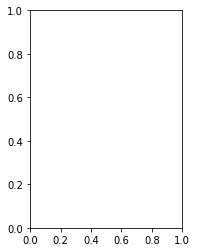

In [ ]:
subax1 = plt.subplot(121)

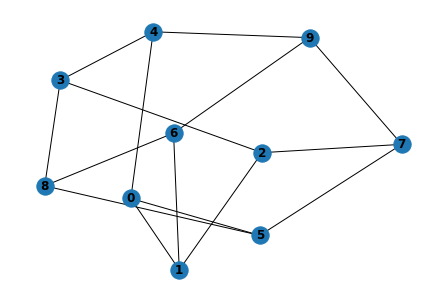

In [ ]:
nx.draw(G, with_labels=True, font_weight='bold')

##Graph

In [ ]:
#convert DIMACs format to NetworkX graph
def to_nxgraph(data):
    #get number of nodes and edges
    nodes, edges = map(int, re.findall(r'p edge (\d+) (\d+)', data)[0])

    #store edges in a list
    edge_list = re.findall(r'^e (\d+) (\d+)', data, flags=re.MULTILINE)
    edge_list = [tuple(map(int, e)) for e in edge_list]

    #create NetworkX graph
    G = nx.Graph()
    G.add_nodes_from([i for i in range(1, nodes + 1)])
    G.add_edges_from(edge_list)

    return G

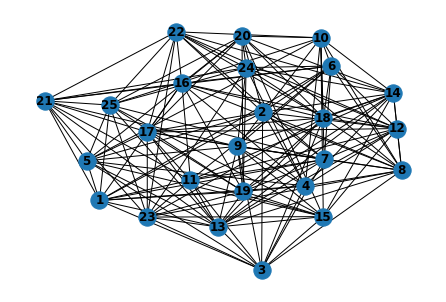

In [ ]:
graph = to_nxgraph(data)
nx.draw(graph, with_labels=True, font_weight='bold')

In [ ]:
#Mvv
adj_matrix = nx.adjacency_matrix(graph).todense()

In [ ]:
adj_matrix

matrix([[0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
         0, 0, 0, 1],
        [1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
         1, 0, 0, 0],
        [1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
         0, 1, 0, 0],
        [1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
         0, 0, 1, 0],
        [1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
         0, 0, 0, 1],
        [1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
         0, 0, 1, 0],
        [1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
         1, 0, 0, 1],
        [0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
         0, 1, 0, 0],
        [0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
         0, 0, 1, 0],
        [0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
         1, 0, 0, 1],
        [1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 

In [ ]:
graph.number_of_nodes()

25

In [ ]:
#chromatic number C
C = 5
v_to_c = np.matrix([[1 for c in range(C)] for v in range(graph.number_of_nodes())])
v_to_c

matrix([[1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1]])

In [ ]:
vertex_embeddings = np.random.normal(0, 1, graph.number_of_nodes())

In [ ]:
vertex_embeddings

array([ 0.13084636, -1.59426605,  2.06130787, -0.13351385, -0.28101405,
        2.64370868, -1.13841314,  0.0458302 ,  0.08776551, -0.62116671,
       -0.05566186,  0.3476736 , -0.94025002, -0.85324377, -0.4582464 ,
        0.01754895,  0.2534807 ,  0.43000586,  0.08021032,  0.82882434,
        0.67467268,  0.01624956,  0.11574657,  0.95553489, -0.24839676])

In [ ]:
colour_embeddings = np.random.uniform(0, 1, C)

In [ ]:
colour_embeddings

array([0.5988689 , 0.04239838, 0.75877041, 0.10929866, 0.42027056])

In [ ]:
adj_matrix * vertex_embeddings

ValueError: ignored

In [ ]:
np.matmul(adj_matrix, vertex_embeddings)

matrix([[ 1.08593279,  3.92173652, -3.79117086,  0.37702713,  0.04105769,
         -0.71962969,  2.20733142,  1.25172787,  2.28889743,  0.93955619,
          2.8548321 , -0.81123623,  1.19256371, -1.01101059,  0.52179506,
          5.26232661, -1.41090771,  4.9514552 , -0.95231075, -2.27372281,
          2.69555853, -1.66082315,  2.81473706,  3.98970276, -0.63700559]])

In [ ]:
np.matmul(v_to_c, colour_embeddings)

matrix([[1.92960691, 1.92960691, 1.92960691, 1.92960691, 1.92960691,
         1.92960691, 1.92960691, 1.92960691, 1.92960691, 1.92960691,
         1.92960691, 1.92960691, 1.92960691, 1.92960691, 1.92960691,
         1.92960691, 1.92960691, 1.92960691, 1.92960691, 1.92960691,
         1.92960691, 1.92960691, 1.92960691, 1.92960691, 1.92960691]])

##Tensorflow

In [ ]:
import tensorflow as tf

In [ ]:
i = np.random.rand(1,16)
i

array([[0.67826951, 0.12670929, 0.60398776, 0.31633471, 0.96838561,
        0.23167574, 0.9903004 , 0.22550383, 0.87003293, 0.22385715,
        0.15576561, 0.26985507, 0.15691941, 0.03411377, 0.47206382,
        0.36891487]])

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(16)))
model.add(tf.keras.layers.Dense(1, activation='relu'))

In [ ]:
np.random.rand(1,2,4)

array([[[0.09478385, 0.10669991, 0.042409  , 0.53221044],
        [0.0376364 , 0.8382772 , 0.4420649 , 0.86072601]]])

In [ ]:
model(np.random.rand(1,16))

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.07902066]], dtype=float32)>

##Generate matrix

In [ ]:
N = 5
prob = 0.5

In [ ]:
Ma = np.random.choice([0,1], size=(N, N), p=[1-prob,prob])
Ma

array([[1, 0, 1, 1, 0],
       [0, 0, 0, 0, 0],
       [1, 1, 0, 0, 1],
       [0, 1, 0, 1, 1],
       [0, 1, 1, 1, 0]])

In [ ]:
Ma.T

array([[1, 0, 1, 0, 0],
       [0, 0, 1, 1, 1],
       [1, 0, 0, 0, 1],
       [1, 0, 0, 1, 1],
       [0, 0, 1, 1, 0]])

In [ ]:
(Ma + Ma.T)//2

array([[1, 0, 1, 0, 0],
       [0, 0, 0, 0, 0],
       [1, 0, 0, 0, 1],
       [0, 0, 0, 1, 1],
       [0, 0, 1, 1, 0]])

In [ ]:
# numpy.tril_indices(n, k=0, m=None): Return the indices for the lower-triangle of an (n, m) array.
#k: Diagonal offset. k = 0 (the default) is the main diagonal, k < 0 is below it and k > 0 is above.

#output: The indices for the triangle. The returned tuple contains two arrays, each with the indices along one dimension of the array.
i_lower = np.tril_indices(N, -1)
i_lower

(array([1, 2, 2, 3, 3, 3, 4, 4, 4, 4]), array([0, 0, 1, 0, 1, 2, 0, 1, 2, 3]))

In [ ]:
Ma.T

array([[1, 0, 1, 0, 0],
       [0, 0, 1, 1, 1],
       [1, 0, 0, 0, 1],
       [1, 0, 0, 1, 1],
       [0, 0, 1, 1, 0]])

In [ ]:
Ma[i_lower]

array([0, 1, 1, 0, 1, 0, 0, 1, 1, 1])

In [ ]:
Ma.T[i_lower]

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 1])

In [ ]:
Ma[i_lower] = Ma.T[i_lower]
Ma

array([[1, 0, 1, 1, 0],
       [0, 0, 0, 0, 0],
       [1, 0, 0, 0, 1],
       [1, 0, 0, 1, 1],
       [0, 0, 1, 1, 0]])

In [ ]:
np.fill_diagonal(Ma, 0)
Ma

array([[0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0],
       [1, 0, 0, 0, 1],
       [1, 0, 0, 0, 1],
       [0, 0, 1, 1, 0]])

In [ ]:
def gen_matrix(N, prob):
    Ma = np.random.choice([0,1], size=(N, N), p=[1-prob,prob])

    #Any square matrix can uniquely be written as sum of a symmetric and a skew-symmetric matrix. This decomposition is known as the Toeplitz decomposition.
    #Let X be a matrix. Then X = (X + Xt)/2 + (X-Xt)/2 where (X+Xt)/2 is symmetric
    Ma = (Ma + Ma.T) // 2

    #no self-loops
    np.fill_diagonal(Ma, 0)
    return Ma

In [ ]:
M = gen_matrix(5, 0.9)
M

array([[0, 1, 1, 1, 1],
       [1, 0, 1, 1, 1],
       [1, 1, 0, 1, 0],
       [1, 1, 1, 0, 1],
       [1, 1, 0, 1, 0]])

In [ ]:
def create_matrix(n, p):
    M = np.zeros((n, n), dtype=np.int64)
    for i in range(n):
        for j in range(i+1, n):
            M[i][j] = random.choices([0,1], [1-p, p])[0]
            M[j][i] = M[i][j]
    return M

In [ ]:
create_matrix(5, 0.8)

array([[0, 1, 1, 1, 1],
       [1, 0, 1, 1, 1],
       [1, 1, 0, 0, 1],
       [1, 1, 0, 0, 1],
       [1, 1, 1, 1, 0]])

In [ ]:
%timeit np.random.choice(2, p=[0.2, 0.8])

The slowest run took 11.52 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 5: 20.3 µs per loop


In [ ]:
%timeit random.choices([0,1], [0.2, 0.8])[0]

The slowest run took 8.88 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 2.27 µs per loop


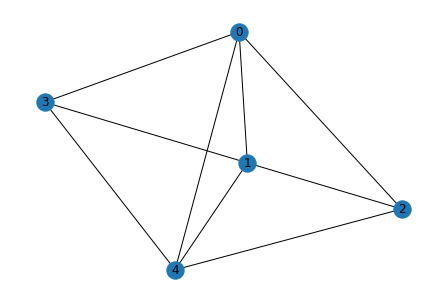

In [ ]:
Ma = nx.from_numpy_matrix(M)
nx.draw(Ma, with_labels=True)

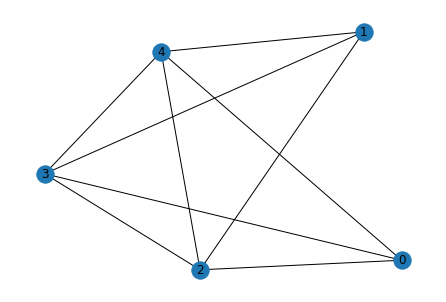

In [ ]:
G = nx.erdos_renyi_graph(5, 0.9)
nx.draw(G, with_labels=True)

In [ ]:
nx.adjacency_matrix(G).todense()

matrix([[0, 1, 0, 1, 1],
        [1, 0, 1, 1, 1],
        [0, 1, 0, 0, 1],
        [1, 1, 0, 0, 1],
        [1, 1, 1, 1, 0]], dtype=int64)

In [ ]:
np.random.randint(5, 10)

9

In [ ]:
def nx_matrix(n, p):
    G = nx.erdos_renyi_graph(n, p)
    # return G
    A = nx.adjacency_matrix(G).todense()
    return A

In [ ]:
def og_gen_matrix(N, prob):
    # Ma = np.zeros((N,N))
    Ma = np.random.choice([0,1], size=(N, N), p=[1-prob,prob])
    i_lower = np.tril_indices(N, -1)
    Ma[i_lower] = Ma.T[i_lower]  # make the matrix symmetric
    np.fill_diagonal(Ma, 0)
    return Ma

In [ ]:
%timeit gen_matrix(np.random.randint(30, 40), 0.8)

The slowest run took 10.35 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 5: 98.4 µs per loop


In [ ]:
%timeit nx_matrix(np.random.randint(30, 40), 0.8)

1000 loops, best of 5: 1.64 ms per loop


In [ ]:
%timeit create_matrix(np.random.randint(30, 40), 0.8)

1000 loops, best of 5: 2.03 ms per loop


## Create Gn,p adjacency matrix

In [ ]:
def gen_matrix(N, prob):
    # Ma = np.zeros((N,N))
    Ma = np.random.choice([0,1], size=(N, N), p=[1-prob,prob])
    i_lower = np.tril_indices(N, -1)
    Ma[i_lower] = Ma.T[i_lower]  # make the matrix symmetric
    np.fill_diagonal(Ma, 0)
    return Ma

In [ ]:
%timeit gen_matrix(np.random.randint(30, 40), 0.8)

The slowest run took 5.35 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 5: 119 µs per loop


##CP SAT Solver

In [ ]:
!pip install ortools

In [ ]:
#https://developers.google.com/optimization/cp/cp_solver
# https://developers.google.com/optimization/reference/python/sat/python/cp_model

In [ ]:
from ortools.sat.python import cp_model

In [ ]:
model = cp_model.CpModel()

In [ ]:
# The solver creates three variables, x, y, and z, each of which can take on the values 0, 1, or 2.
num_vals = 3
x = model.NewIntVar(0, num_vals - 1, 'x')
y = model.NewIntVar(0, num_vals - 1, 'y')
z = model.NewIntVar(0, num_vals - 1, 'z')

In [ ]:
x, y, z

(x(0..2), y(0..2), z(0..2))

In [ ]:
model.Add(x != y)

In [ ]:
solver = cp_model.CpSolver()
status = solver.Solve(model)

In [ ]:
solver, status

(<ortools.sat.python.cp_model.CpSolver at 0x7f488f1bd610>, 4)

In [ ]:
cp_model.OPTIMAL

4

In [ ]:
if status == cp_model.OPTIMAL or status == cp_model.FEASIBLE:
    print('x = %i' % solver.Value(x))
    print('y = %i' % solver.Value(y))
    print('z = %i' % solver.Value(z))
else:
    print('No solution found.')

x = 1
y = 0
z = 0


In [ ]:
solver.parameters.enumerate_all_solutions = True

solver.SolveWithSolutionCallback(model, cp_model.VarArraySolutionPrinter([x, y, z]))

Solution 0, time = 0.00 s
  x = 1   y = 0   z = 0 
Solution 1, time = 0.00 s
  x = 2   y = 0   z = 0 
Solution 2, time = 0.01 s
  x = 2   y = 0   z = 1 
Solution 3, time = 0.01 s
  x = 1   y = 0   z = 1 
Solution 4, time = 0.01 s
  x = 2   y = 1   z = 1 
Solution 5, time = 0.01 s
  x = 2   y = 1   z = 0 
Solution 6, time = 0.01 s
  x = 2   y = 1   z = 2 
Solution 7, time = 0.01 s
  x = 2   y = 0   z = 2 
Solution 8, time = 0.01 s
  x = 1   y = 0   z = 2 
Solution 9, time = 0.01 s
  x = 0   y = 1   z = 2 
Solution 10, time = 0.01 s
  x = 0   y = 1   z = 1 
Solution 11, time = 0.01 s
  x = 0   y = 2   z = 1 
Solution 12, time = 0.02 s
  x = 0   y = 2   z = 2 
Solution 13, time = 0.02 s
  x = 1   y = 2   z = 2 
Solution 14, time = 0.02 s
  x = 1   y = 2   z = 1 
Solution 15, time = 0.02 s
  x = 1   y = 2   z = 0 
Solution 16, time = 0.02 s
  x = 0   y = 2   z = 0 
Solution 17, time = 0.02 s
  x = 0   y = 1   z = 0 


4

In [ ]:
M = gen_matrix(5, 0.8)
M

array([[0, 1, 1, 1, 1],
       [1, 0, 1, 1, 1],
       [1, 1, 0, 1, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 0, 0, 0]])

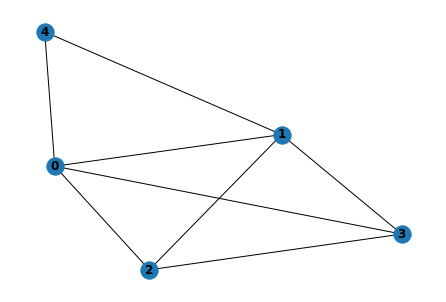

In [ ]:
Anx = nx.convert_matrix.from_numpy_matrix(M)
nx.draw(Anx, with_labels=True, font_weight='bold')

In [ ]:
n_colors = 3

In [ ]:
model = cp_model.CpModel()
N = len(M)
N

5

In [ ]:
variables = [ model.NewIntVar(0, n_colors-1, '{i}'.format(i=i)) for i in range(N) ]
variables

[0(0..2), 1(0..2), 2(0..2), 3(0..2), 4(0..2)]

In [ ]:
for i in range(N):
    for j in range(i+1,N):
        if M[i][j] == 1:
            model.Add( variables[i] != variables [j] )

In [ ]:
solver = cp_model.CpSolver()
status = solver.Solve(model)

In [ ]:
if status == cp_model.FEASIBLE or status == cp_model.OPTIMAL :
    solution = dict()
    for k in range(N):
        solution[k] = solver.Value(variables[k])
    print( solution )
elif status == cp_model.INFEASIBLE:
    print('None')
else:
    print("CSP is unsure about the problem")

None


In [ ]:
def solve_cp(M, n_colors):
    model = cp_model.CpModel()
    N = len(M)
    # Anx = nx.convert_matrix.from_numpy_matrix(M)

    variables = [ model.NewIntVar(0, n_colors-1, '{i}'.format(i=i)) for i in range(N) ]

    for i in range(N):
        for j in range(i+1,N):
            if M[i][j] == 1:
                model.Add( variables[i] != variables [j] )

    solver = cp_model.CpSolver()
    status = solver.Solve(model)

    solution = dict()
    if status == cp_model.FEASIBLE or status == cp_model.OPTIMAL :
        for k in range(N):
            solution[k] = solver.Value(variables[k])
        # print( solution )
        return solution
    elif status == cp_model.INFEASIBLE:
        # print('None')
        return None
    else:
        # print("CSP is unsure about the problem")
        raise Exception("CSP is unsure about the problem")


    # subax1 = plt.subplot(121)
    # nx.draw(Anx, with_labels=True, font_weight='bold')

    # if solution:
    #     subax2 = plt.subplot(122)
    #     nx.draw(Anx, with_labels=True, font_weight='bold', node_color=list(solution.values()))   


In [ ]:
M = gen_matrix(5, 0.8)
M

array([[0, 1, 1, 0, 1],
       [1, 0, 0, 1, 1],
       [1, 0, 0, 1, 1],
       [0, 1, 1, 0, 1],
       [1, 1, 1, 1, 0]])

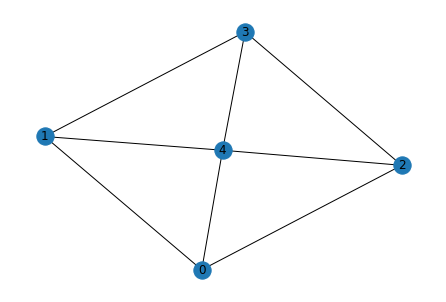

In [ ]:
G = nx.convert_matrix.from_numpy_matrix(M)
nx.draw(G, with_labels=True)

In [ ]:
solution = solve_cp(M, 5)
solution

{0: 3, 1: 2, 2: 2, 3: 1, 4: 0}

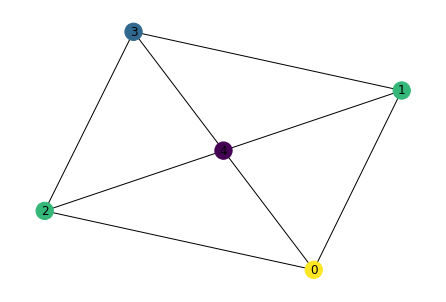

In [ ]:
Anx = nx.convert_matrix.from_numpy_matrix(M)
nx.draw(Anx, with_labels=True, node_color=list(solution.values()))

In [ ]:
G = nx.adjacency_matrix(nx.erdos_renyi_graph(5, 0.8))

## Degree Ranking

In [ ]:
Ma = gen_matrix(5, 0.8)
Ma

array([[0, 1, 1, 1, 1],
       [1, 0, 1, 1, 1],
       [1, 1, 0, 1, 1],
       [1, 1, 1, 0, 1],
       [1, 1, 1, 1, 0]])

In [ ]:
G = nx.from_numpy_matrix(Ma)
G

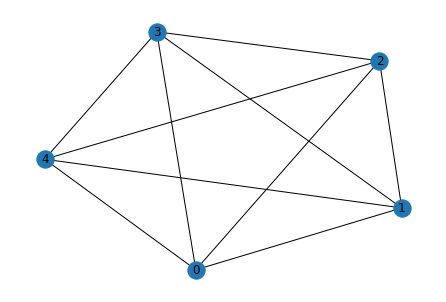

In [ ]:
nx.draw(G, with_labels=True)

In [ ]:
deg = np.asarray([j for i, j in G.degree])
deg

array([4, 4, 4, 4, 4])

In [ ]:
deg = (np.amax(deg)+1) - deg
deg

array([1, 1, 1, 1, 1])

In [ ]:
np.argsort(deg)

array([0, 1, 2, 3, 4])

In [ ]:
deg1 = np.asarray([j for i, j in G.degree])
deg1

array([4, 4, 4, 4, 4])

In [ ]:
np.argsort(deg1)[::-1][:5]

array([4, 3, 2, 1, 0])

In [ ]:
def degree_ranking(Ma):
    G = nx.from_numpy_matrix(Ma)
    deg = np.asarray([j for i, j in G.degree])
    deg = (np.amax(deg)+1) - deg #higher degree comes first
    deg_rank = np.argsort(deg)

    return deg_rank

In [ ]:
degree_ranking(Ma)

array([0, 1, 2, 3, 4])

##Chromatic Number Check

In [ ]:
def is_cn(Ma, cn_i):
  if solve_cp(Ma, cn_i-1) == None:
    return True
  else:
    return False

##Find frozen edge

In [ ]:
def find_diff_edge(Ma, Cn, not_edges):
    for k, (i, j) in enumerate(not_edges):
        Ma[i,j] = Ma[j,i] = 1
        sol = solve_cp(Ma, Cn)
        if sol is None: #diff_edge found
            diff_edge = (i,j)
            Ma[i,j] = Ma[j,i] = 0 #backtrack  
            return diff_edge
    return None

##Not edges

In [ ]:
Ma = gen_matrix(5, 0.8)
Ma

array([[0, 1, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [1, 0, 1, 0, 1],
       [0, 0, 0, 1, 0]])

In [ ]:
Cn = 3

In [ ]:
N = Ma.shape[0]
N

5

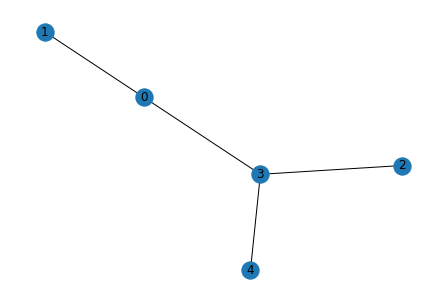

In [ ]:
G = nx.from_numpy_matrix(Ma)
nx.draw(G, with_labels=True)

In [ ]:
init_sol = solve_cp(Ma, Cn)
init_sol

{0: 0, 1: 1, 2: 0, 3: 1, 4: 0}

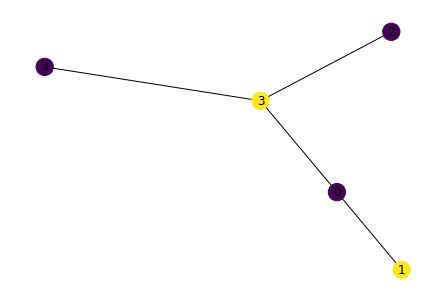

In [ ]:
nx.draw(G, with_labels=True, node_color=list(init_sol.values()))

In [ ]:
if init_sol is not None and is_cn(Ma,Cn):
    deg_rank = degree_ranking( Ma )
deg_rank

array([0, 2, 1, 3, 4])

In [ ]:
G.degree

DegreeView({0: 2, 1: 1, 2: 1, 3: 3, 4: 1})

In [ ]:
# not_edges = []
for w in deg_rank:
    # np.fill_diagonal(Ma,1)
    not_edges = [ (w,j) for j in range(5) if  w != j and Ma[w,j] == 0 ]
    # np.fill_diagonal(Ma,0)
    random.shuffle(not_edges)
    diff_edge = find_diff_edge(Ma, Cn, not_edges)
    if diff_edge is not None:
        print(Ma)
        print(Cn)
        print(diff_edge)

[[0 1 1 1 1]
 [1 0 0 0 0]
 [1 0 0 1 0]
 [1 0 1 0 1]
 [1 0 0 1 0]]
3
(2, 4)
[[0 1 1 1 1]
 [1 0 1 0 1]
 [1 1 0 1 0]
 [1 0 1 0 1]
 [1 1 0 1 0]]
3
(1, 3)
[[0 1 1 1 1]
 [1 0 1 0 1]
 [1 1 0 1 0]
 [1 0 1 0 1]
 [1 1 0 1 0]]
3
(3, 1)
[[0 1 1 1 1]
 [1 0 1 0 1]
 [1 1 0 1 0]
 [1 0 1 0 1]
 [1 1 0 1 0]]
3
(4, 2)


In [ ]:
Ma, deg_rank

(array([[0, 1, 1, 1, 1],
        [1, 0, 1, 0, 1],
        [1, 1, 0, 1, 0],
        [1, 0, 1, 0, 1],
        [1, 1, 0, 1, 0]]), array([0, 2, 1, 3, 4]))

##Prob Constraints

In [ ]:
def pc(c, n):
    b = pow(n, (2*c)/n)
    p = 1 - (1/b)
    return p

##Main functions

In [ ]:
def gen_matrix(N, prob):
    # Ma = np.zeros((N,N))
    Ma = np.random.choice([0,1], size=(N, N), p=[1-prob,prob])
    i_lower = np.tril_indices(N, -1)
    Ma[i_lower] = Ma.T[i_lower]  # make the matrix symmetric
    np.fill_diagonal(Ma, 0)
    return Ma

def solve_cp(M, n_colors):
    model = cp_model.CpModel()
    N = len(M)
    # Anx = nx.convert_matrix.from_numpy_matrix(M)

    variables = [ model.NewIntVar(0, n_colors-1, '{i}'.format(i=i)) for i in range(N) ]

    for i in range(N):
        for j in range(i+1,N):
            if M[i][j] == 1:
                model.Add( variables[i] != variables [j] )

    solver = cp_model.CpSolver()
    status = solver.Solve(model)

    solution = dict()
    if status == cp_model.FEASIBLE or status == cp_model.OPTIMAL :
        for k in range(N):
            solution[k] = solver.Value(variables[k])
        # print( solution )
        return solution
    elif status == cp_model.INFEASIBLE:
        # print('None')
        return None
    else:
        # print("CSP is unsure about the problem")
        raise Exception("CSP is unsure about the problem")

def degree_ranking(Ma):
    G = nx.from_numpy_matrix(Ma)
    deg = np.asarray([j for i, j in G.degree])
    deg = (np.amax(deg)+1) - deg #higher degree comes first
    deg_rank = np.argsort(deg)

    return deg_rank

def is_cn(Ma, cn_i):
  if solve_cp(Ma, cn_i-1) == None:
    return True
  else:
    return False

def find_diff_edge(Ma, Cn, not_edges):
    for k, (i, j) in enumerate(not_edges):
        Ma[i,j] = Ma[j,i] = 1
        sol = solve_cp(Ma, Cn)
        if sol is None: #diff_edge found
            diff_edge = (i,j)
            Ma[i,j] = Ma[j,i] = 0 #backtrack  
            return diff_edge
    return None

def pc(c, n):
    b = pow(n, (2*c)/n)
    p = 1 - (1/b)
    return p


##Train dataset

In [ ]:
# prob_constraints = { 3:(0.01,0.1), 4:(0.1,0.2), 5:(0.2,0.3), 6:(0.2,0.3), 7:(0.3,0.4), 8:(0.4,0.5) }

In [ ]:
samples = 32
nmin = 10
nmax = 20

In [ ]:
prob_constraints = dict()
for c in range(3, 9):
    prob_constraints[c] = (pc(c, nmax), pc(c, nmin))
prob_constraints

{3: (0.5929094684630956, 0.748811356849042),
 4: (0.6982911831727419, 0.8415106807538887),
 5: (0.7763932022500211, 0.9),
 6: (0.8342772991330006, 0.9369042655519807),
 7: (0.8771771973884209, 0.9601892829446502),
 8: (0.908971789848696, 0.9748811356849042)}

In [ ]:
train = []
for z in range(samples):
    N = np.random.randint(nmin,nmax+1)
    # Ma = np.zeros((N,N))

    Cn = np.random.randint(3,8)
    # Cn = 3
    lim_inf, lim_sup = prob_constraints[Cn][0], prob_constraints[Cn][1]
    # lim_inf, lim_sup = 0.9, 0.95

    p_connected = random.uniform(lim_inf,lim_sup) 
    Ma = gen_matrix(N, p_connected)

    try:
        init_sol = solve_cp(Ma, Cn)
        if init_sol is not None and is_cn(Ma,Cn):
            deg_rank = degree_ranking( Ma )
            for w in deg_rank:
                not_edges = [ (w,j) for j in range(N) if  w != j and Ma[w,j] == 0 ]
                random.shuffle(not_edges)
                diff_edge = find_diff_edge(Ma, Cn, not_edges)
                if diff_edge is not None:
                    train.append((Ma, Cn, diff_edge))
                    break
        elif init_sol is None:
            # print("No initial solution\n")
            edges = [ (i,j) for i in range(N) for j in range(i+1,N) if Ma[i,j] == 1]
            random.shuffle(edges)
            diff_edge = None
            for k, (i, j) in enumerate(edges):
                Ma[i, j] = Ma[j, i] = 0
                sol = solve_cp(Ma, Cn)
                if sol is not None and is_cn(Ma, Cn):
                    diff_edge = (i, j)
                    break
            if diff_edge is not None:
                train.append((Ma, Cn, diff_edge))
        else:
            print('No solution ' + str(N) + ' ' + str(Cn))
    except Exception as error:
        print(error)

In [ ]:
print(len(train))
# for t in train[:5]:
#     print(t)

32


In [ ]:
train[:2]

[(array([[0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1],
         [1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0],
         [1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0],
         [1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1],
         [0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1],
         [1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1],
         [1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1],
         [0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1],
         [1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0],
         [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1],
         [0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1],
         [0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0],
         [1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0],
         [1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0],
         [0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,

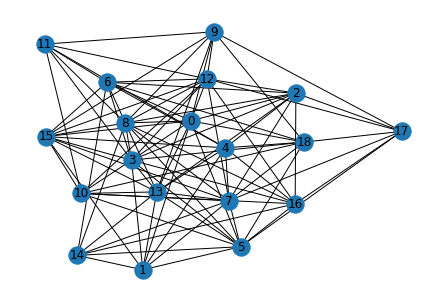

In [ ]:
G = nx.from_numpy_matrix(train[0][0])
nx.draw(G, with_labels=True)

In [ ]:
df_train = pd.DataFrame(train, columns=['Matrix', 'Chrom_Number', 'Frozen_edge'])

In [ ]:
df_train['Matrix'].iloc[0]

array([[0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1],
       [1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0],
       [1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0],
       [1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1],
       [0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1],
       [1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1],
       [1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1],
       [0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1],
       [1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1],
       [0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1],
       [0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
       [1,

In [ ]:
df_train.to_csv('Train.csv', index=False)

##Read Train

In [ ]:
df_train = pd.read_csv('Train_10_20_256.csv')

In [ ]:
df_train

Matrix  Chrom_no Diff_edge
0    [[0, 1, 1, 0, 0, 1, 0, 1, 1, 1], [1, 0, 1, 1, ...         4    (6, 8)
1    [[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1], [0, 0, 1, ...         3    (2, 7)
2    [[0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1], [...         4    (2, 9)
3    [[0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,...         5  (12, 14)
4    [[0, 0, 1, 1, 1, 1, 1, 1, 1, 1], [0, 0, 1, 1, ...         6    (0, 1)
..                                                 ...       ...       ...
249  [[0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0], [0, 0, ...         6   (10, 3)
250  [[0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1], [0, ...         5    (0, 1)
251  [[0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,...         6   (3, 14)
252  [[0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,...         7    (1, 3)
253  [[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,...         4  (10, 17)

[254 rows x 3 columns]

In [ ]:
def str_to_matrix(matrix):
    rows = matrix.split('\n ')
    rows[0] = rows[0][1:]
    rows[-1] = rows[-1][:-1]
    rows = [row[1:-1] for row in rows]
    np_rows = np.array([np.fromstring(r, dtype=int, sep=" ") for r in rows])
    return np_rows

str_to_matrix(df_train['Matrix'].iloc[0])

array([[0, 1, 1, 0, 0, 1, 0, 1, 1, 1],
       [1, 0, 1, 1, 1, 0, 1, 1, 0, 0],
       [1, 1, 0, 0, 1, 1, 0, 1, 0, 1],
       [0, 1, 0, 0, 1, 0, 1, 1, 1, 0],
       [0, 1, 1, 1, 0, 0, 1, 0, 1, 0],
       [1, 0, 1, 0, 0, 0, 1, 1, 1, 0],
       [0, 1, 0, 1, 1, 1, 0, 0, 0, 1],
       [1, 1, 1, 1, 0, 1, 0, 0, 1, 1],
       [1, 0, 0, 1, 1, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 0, 0, 1, 1, 1, 0]])

In [ ]:
def str_to_tuple(edge):
    edge = edge[1:-1]
    edge_t = tuple(map(int, edge.split(", ")))
    return edge_t
str_to_tuple(df_train['Diff_edge'].iloc[0])

(6, 8)

In [ ]:
df_train["Matrix"] = df_train.Matrix.apply(str_to_matrix)

In [ ]:
df_train["Diff_edge"] = df_train["Diff_edge"].apply(str_to_tuple)

In [ ]:
train = df_train.values.tolist()

##Read Test

In [ ]:
df_test = pd.read_csv('Test_20_30_32.csv')

In [ ]:
df_test["Matrix"] = df_test.Matrix.apply(str_to_matrix)

In [ ]:
df_test["Diff_edge"] = df_test["Diff_edge"].apply(str_to_tuple)

In [ ]:
df_test

Matrix  Chrom_no Diff_edge
0   [[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,...         3    (5, 7)
1   [[0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,...         6  (19, 22)
2   [[0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,...         6  (12, 13)
3   [[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,...         3   (6, 23)
4   [[0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,...         7    (3, 6)
5   [[0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,...         3   (2, 15)
6   [[0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,...         5   (0, 11)
7   [[0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,...         3   (8, 18)
8   [[0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,...         6    (6, 9)
9   [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,...         3   (4, 28)
10  [[0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,...         6  (15, 19)
11  [[0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,...         5   (6, 16)
12  [[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,...         4  (11, 22)
13  [[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,...         7    (4, 5)
14  [[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,...         4    (3, 8)
15  [[0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,...         6   (7, 18)
16  [[0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,...         4   (9, 19)
17  [[0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,...         6    (5, 6)
18  [[0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,...         5    (2, 6)
19  [[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...         3  (10, 22)
20  [[0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,...         5   (4, 18)
21  [[0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,...         6   (9, 16)
22  [[0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,...         6   (5, 16)
23  [[0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,...         7    (4, 7)
24  [[0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,...         3   (0, 15)
25  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,...         4  (16, 27)
26  [[0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,...         7    (4, 5)
27  [[0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,...         6   (2, 20)
28  [[0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,...         5  (15, 22)
29  [[0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,...         4  (14, 17)
30  [[0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,...         6    (5, 6)
31  [[0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,...         3    (3, 8)

In [ ]:
test = df_test.values.tolist()

In [ ]:
test[0]

[array([[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
         0, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
         1, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
         1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
         0, 1, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0

##Test

In [ ]:
test = []
nmin = 20
nmax = 30
for z in range(10):
    N = np.random.randint(nmin,nmax+1)
    # Ma = np.zeros((N,N))

    Cn = np.random.randint(3,8)
    # Cn = 3
    lim_inf, lim_sup = prob_constraints[Cn][0], prob_constraints[Cn][1]
    # lim_inf, lim_sup = 0.9, 0.95

    p_connected = random.uniform(lim_inf,lim_sup) 
    Ma = gen_matrix(N, p_connected)

    try:
        init_sol = solve_cp(Ma, Cn)
        if init_sol is not None and is_cn(Ma,Cn):
            deg_rank = degree_ranking( Ma )
            for w in deg_rank:
                not_edges = [ (w,j) for j in range(N) if  w != j and Ma[w,j] == 0 ]
                random.shuffle(not_edges)
                diff_edge = find_diff_edge(Ma, Cn, not_edges)
                if diff_edge is not None:
                    test.append((Ma, Cn, diff_edge))
                    break
        elif init_sol is None:
            # print("No initial solution\n")
            edges = [ (i,j) for i in range(N) for j in range(i+1,N) if Ma[i,j] == 1]
            random.shuffle(edges)
            diff_edge = None
            for k, (i, j) in enumerate(edges):
                Ma[i, j] = Ma[j, i] = 0
                sol = solve_cp(Ma, Cn)
                if sol is not None and is_cn(Ma, Cn):
                    diff_edge = (i, j)
                    break
            if diff_edge is not None:
                test.append((Ma, Cn, diff_edge))
        else:
            print('No solution ' + str(N) + ' ' + str(Cn))
    except Exception as error:
        print(error)

In [ ]:
(len(test))

10

In [ ]:
test[0]

(array([[0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
         0, 0],
        [0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
         1, 1],
        [0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
         1, 0],
        [1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
         1, 1],
        [1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
         0, 0],
        [1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
         1, 0],
        [1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
         0, 1],
        [1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
         1, 0],
        [1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 0],
        [0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
         1, 0],
        [1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
         1, 1],

##Train_SAT_UNSAT

In [ ]:
train_sat_unsat = []
for i in train:
    Ma, Cn, diff_edge = i
    
    Ma1 = Ma
    Ma2 = Ma.copy()

    Ma2[diff_edge[0], diff_edge[1]] = Ma2[diff_edge[1], diff_edge[0]] =1

    train_sat_unsat.append([Ma1, Cn, diff_edge])
    train_sat_unsat.append([Ma2, Cn, diff_edge])

In [ ]:
print(len(train_sat_unsat))
for i in train_sat_unsat[:5]:
    print(i)

508
[array([[0, 1, 1, 0, 0, 1, 0, 1, 1, 1],
       [1, 0, 1, 1, 1, 0, 1, 1, 0, 0],
       [1, 1, 0, 0, 1, 1, 0, 1, 0, 1],
       [0, 1, 0, 0, 1, 0, 1, 1, 1, 0],
       [0, 1, 1, 1, 0, 0, 1, 0, 1, 0],
       [1, 0, 1, 0, 0, 0, 1, 1, 1, 0],
       [0, 1, 0, 1, 1, 1, 0, 0, 0, 1],
       [1, 1, 1, 1, 0, 1, 0, 0, 1, 1],
       [1, 0, 0, 1, 1, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 0, 0, 1, 1, 1, 0]]), 4, (6, 8)]
[array([[0, 1, 1, 0, 0, 1, 0, 1, 1, 1],
       [1, 0, 1, 1, 1, 0, 1, 1, 0, 0],
       [1, 1, 0, 0, 1, 1, 0, 1, 0, 1],
       [0, 1, 0, 0, 1, 0, 1, 1, 1, 0],
       [0, 1, 1, 1, 0, 0, 1, 0, 1, 0],
       [1, 0, 1, 0, 0, 0, 1, 1, 1, 0],
       [0, 1, 0, 1, 1, 1, 0, 0, 1, 1],
       [1, 1, 1, 1, 0, 1, 0, 0, 1, 1],
       [1, 0, 0, 1, 1, 1, 1, 1, 0, 1],
       [1, 0, 1, 0, 0, 0, 1, 1, 1, 0]]), 4, (6, 8)]
[array([[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1],
       [0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0],
       [0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0],
       [0, 1, 0, 0,

##Test SAT_UNSAT

In [ ]:
test_sat_unsat = []
for i in test:
    Ma, Cn, diff_edge = i
    
    Ma1 = Ma
    Ma2 = Ma.copy()

    Ma2[diff_edge[0], diff_edge[1]] = Ma2[diff_edge[1], diff_edge[0]] =1

    test_sat_unsat.append([Ma1, Cn, diff_edge])
    test_sat_unsat.append([Ma2, Cn, diff_edge])

In [ ]:
len(test_sat_unsat)

64

##Create batch

In [ ]:
def create_batch(instances):
    n_instances = len(instances)
    n_vertices  = np.array([ x[0].shape[0] for x in instances ])
    n_edges     = np.array([ len(np.nonzero(x[0])[0]) for x in instances ])
    n_colors    = np.array( [x[1] for x in instances])

    total_vertices  = sum(n_vertices)
    total_edges     = sum(n_edges)
    total_colors    = sum(n_colors)

    M  = np.zeros((total_vertices,total_vertices))
    MC = np.zeros((total_vertices, total_colors))

    cn_exists = np.array([ 1-(i%2) for i in range(n_instances) ])

    for (i,(Ma,chrom_number,f)) in enumerate(instances):
        n, m, c = n_vertices[i], n_edges[i], n_colors[i]
        n_acc = sum(n_vertices[0:i])
        m_acc = sum(n_edges[0:i])
        c_acc = sum(n_colors[0:i])

        MC[n_acc:n_acc+n,c_acc:c_acc+c] = 1

        edges = list(zip(np.nonzero(Ma)[0], np.nonzero(Ma)[1]))

        for e,(x,y) in enumerate(edges):
            # if Ma[x,y] == 1:
            M[n_acc+x,n_acc+y] = M[n_acc+y,n_acc+x] = 1

    return M, n_colors, MC, cn_exists, n_vertices, n_edges, f

batch = create_batch(train_sat_unsat)
batch

(array([[0., 1., 1., ..., 0., 0., 0.],
        [1., 0., 1., ..., 0., 0., 0.],
        [1., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 1., 1., 0.]]),
 array([4, 4, 3, 3, 4, 4, 5, 5, 6, 6, 6, 6, 6, 6, 3, 3, 3, 3, 7, 7, 6, 6,
        7, 7, 3, 3, 4, 4, 5, 5, 5, 5, 3, 3, 3, 3, 5, 5, 4, 4, 4, 4, 7, 7,
        5, 5, 4, 4, 5, 5, 4, 4, 6, 6, 5, 5, 5, 5, 4, 4, 6, 6, 4, 4, 5, 5,
        7, 7, 5, 5, 3, 3, 6, 6, 5, 5, 4, 4, 7, 7, 3, 3, 4, 4, 3, 3, 6, 6,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 7, 7, 3, 3, 6, 6, 4, 4, 6, 6, 3, 3,
        5, 5, 6, 6, 7, 7, 6, 6, 7, 7, 5, 5, 3, 3, 3, 3, 3, 3, 6, 6, 3, 3,
        7, 7, 7, 7, 6, 6, 6, 6, 4, 4, 3, 3, 7, 7, 5, 5, 5, 5, 7, 7, 3, 3,
        7, 7, 3, 3, 5, 5, 5, 5, 5, 5, 6, 6, 4, 4, 6, 6, 5, 5, 4, 4, 4, 4,
        6, 6, 4, 4, 7, 7, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 3, 3, 4, 4, 7, 7,
        3, 3, 3, 3, 6, 6, 6, 6, 4, 4, 3, 3, 7, 7, 6, 6, 4, 4, 7, 7, 5, 5,
        7, 

In [ ]:
batch_test = create_batch(test_sat_unsat)
batch_test

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 1., 0.]]),
 array([3, 3, 6, 6, 6, 6, 3, 3, 7, 7, 3, 3, 5, 5, 3, 3, 6, 6, 3, 3, 6, 6,
        5, 5, 4, 4, 7, 7, 4, 4, 6, 6, 4, 4, 6, 6, 5, 5, 3, 3, 5, 5, 6, 6,
        6, 6, 7, 7, 3, 3, 4, 4, 7, 7, 6, 6, 5, 5, 4, 4, 6, 6, 3, 3]),
 array([[1., 1., 1., ..., 0., 0., 0.],
        [1., 1., 1., ..., 0., 0., 0.],
        [1., 1., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 1., 1., 1.],
        [0., 0., 0., ..., 1., 1., 1.],
        [0., 0., 0., ..., 1., 1., 1.]]),
 array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]),
 array([30, 30, 24, 24, 27, 27, 29, 29, 23, 23, 23, 23, 22, 22, 26

##MLP

In [ ]:
layers = []

In [ ]:
layer_sizes = [64 for _ in range(3)]
layer_sizes

[64, 64, 64]

In [ ]:
activations = 'relu'

In [ ]:
activations = [ activations for _ in layer_sizes ]
activations

['relu', 'relu', 'relu']

In [ ]:
output_size = 1
output_activation = None

In [ ]:
if output_size is not None:
    layer_sizes = layer_sizes + [output_size]
    activations = activations + [output_activation]

In [ ]:
layer_sizes, activations

([64, 64, 64, 1], ['relu', 'relu', 'relu', None])

In [ ]:
for i, params in enumerate( zip( layer_sizes, activations ) ):
    size, activation = params
    new_layer = tf.keras.layers.Dense(size, activation = activation)
    layers.append(new_layer)
layers

In [ ]:
class MLP(object):
    def __init__(
        self,
        layer_sizes,
        output_size = None,
        activations = None,
        output_activation = None
    ):
        self.layers = []
        if output_size is not None:
            layer_sizes = layer_sizes + [output_size]
            activations = activations + [output_activation]
        for i, params in enumerate( zip( layer_sizes, activations ) ):
            size, activation = params
            new_layer = tf.keras.layers.Dense(size, activation = activation)
            self.layers.append(new_layer)

    def __call__( self, inputs, *args, **kwargs ):
        outputs = [ inputs ]
        for layer in self.layers:
            outputs.append( layer( outputs[-1] ) )
        #end for
        return outputs[-1]

##GraphNN

In [ ]:
d = 64

In [ ]:
# var is a dictionary from variable names to embedding sizes.
# That is: an entry var["V1"] = 10 means that the variable "V1" will have an embedding size of 10

var = {# V is the set of vertex embeddings
       'V': d,
       # C is for color embeddings
       'C': d
       }

In [ ]:
# mat is a dictionary from matrix names to variable pairs.
# That is: an entry mat["M"] = ("V1","V2") means that the matrix "M" can be used to mask messages from "V1" to "V2".

mat = {# M is a V×V adjacency matrix connecting each vertex to its neighbors
       'M': ('V','V'),
       # MC is a VxC adjacency matrix connecting each vertex to its candidate colors
       'VC': ('V','C')
       }

In [ ]:
# msg is a dictionary from function names to variable pairs.
# That is: an entry msg["cast"] = ("V1","V2") means that one can apply "cast" to convert messages from "V1" to "V2".

msg = {# V_msg_C is a MLP which computes messages from vertex embeddings to color embeddings
       'V_msg_C': ('V','C'),
       # C_msg_V is a MLP which computes messages from color embeddings to vertex embeddings
       'C_msg_V': ('C','V')
       }

In [ ]:
# loop is a dictionary from variable names to lists of dictionaries:
# {
# "mat": the matrix name which will be used,
# "transpose?": if true then the matrix M will be transposed,
# "fun": transfer function (python function built using tensorflow operations,
# "msg": message name,
# "var": variable name
# }
# If "mat" is None, it will be the identity matrix,
# If "transpose?" is None, it will default to false,
# if "fun" is None, no function will be applied,
# If "msg" is false, no message conversion function will be applied,
# If "var" is false, then [1] will be supplied as a surrogate.

# That is: an entry loop["V2"] = [ {"mat":None,"fun":f,"var":"V2"}, {"mat":"M","transpose?":true,"msg":"cast","var":"V1"} ] 
# enforces the following update rule for every timestep:
# V2 ← tf.append( [ f(V2), Mᵀ × cast(V1) ] )

loop = {   # V(t+1) <- Vu( M x V, VC x CmsgV(C) )
            'V': [
                    {
                        'mat': 'M',
                        'var': 'V'
                    },
                    {
                        'mat': 'VC',
                        'var': 'C',
                        'msg': 'C_msg_V'
                    }
                ],
            # C(t+1) <- Cu( VC^T x VmsgC(V))
            'C': [
                    {
                        'mat': 'VC',
                        'msg': 'V_msg_C',
                        'transpose?': True,
                        'var': 'V'
                    }
                ]
        }

In [ ]:
MLP_depth = 3

In [ ]:
RNN_cell = tf.keras.layers.LSTMCell

In [ ]:
NormLayer = tf.keras.layers.LayerNormalization()
NormLayer

In [ ]:
Cell_activation = 'relu'
Msg_activation = 'relu'
Msg_last_activation = None
float_dtype = tf.float32

In [ ]:
x = tfa.rnn.LayerNormLSTMCell(d, activation=Cell_activation)
x

In [ ]:
RNN_cells = {v : tfa.rnn.LayerNormLSTMCell(d, activation=Cell_activation) for v,d in var.items()}
RNN_cells

{'V': <tensorflow_addons.rnn.layer_norm_lstm_cell.LayerNormLSTMCell at 0x1bbb10075f8>,
 'C': <tensorflow_addons.rnn.layer_norm_lstm_cell.LayerNormLSTMCell at 0x1bbb0fdde10>}

In [ ]:
msg_MLP = { msg: MLP(
                    layer_sizes       = [ var[vin] for _ in range( MLP_depth ) ],
                    output_size       = var[vout], 
                    activations       = [ Msg_activation for _ in range( MLP_depth ) ],
                    output_activation = Msg_last_activation
                    ) for msg, (vin,vout) in msg.items()
         }
msg_MLP

{'V_msg_C': <__main__.MLP at 0x1bbd81acda0>,
 'C_msg_V': <__main__.MLP at 0x1bbd81ace48>}

In [ ]:
class GraphNN(object):
    def __init__(
    self,
    var,
    mat,
    msg,
    loop,
    MLP_depth = 3,
    RNN_cell = tfa.rnn.LayerNormLSTMCell,
    Cell_activation = 'relu',
    Msg_activation = 'relu',
    Msg_last_activation = None,
    float_dtype = tf.float32,
    name = 'GraphNN'
    ):
        self.var, self.mat, self.msg, self.loop, self.name = var, mat, msg, loop, name

        self.MLP_depth = MLP_depth
        self.RNN_cell = RNN_cell
        self.Cell_activation = Cell_activation
        self.Msg_activation = Msg_activation
        self.Msg_last_activation  = Msg_last_activation 
        self.float_dtype = float_dtype

        with tf.compat.v1.variable_scope(self.name):
            with tf.compat.v1.variable_scope('parameters'):
                self._init_parameters()

    def _init_parameters(self):
        # Init LSTM cells
        self._RNN_cells = {
            v: self.RNN_cell(
                            d,
                            activation = self.Cell_activation
                            ) for (v,d) in self.var.items()
                        }
        # Init message-computing MLPs
        self._msg_MLPs = {
            msg: MLP(
                    layer_sizes          = [ self.var[vin] for _ in range( self.MLP_depth ) ],
                    output_size          = self.var[vout],
                    activations          = [ self.Msg_activation for _ in range( self.MLP_depth ) ],
                    output_activation    = self.Msg_last_activation,
                    ) for msg, (vin,vout) in self.msg.items()
                    }

    def __call__( self, adjacency_matrices, initial_embeddings, time_steps, LSTM_initial_states = {} ):
        with tf.compat.v1.variable_scope(self.name):
            states = {}
            for v, init in initial_embeddings.items():
                h0 = init
                c0 = tf.zeros_like(h0, dtype=self.float_dtype) if v not in LSTM_initial_states else LSTM_initial_states[v]
                # states[v] = tf.compat.v1.nn.rnn_cell.LSTMStateTuple(h=h0, c=c0)
                states[v] = [h0, c0]
        
        # Build while loop body function
            def while_body( t, states ):
                new_states = {}
                for v in self.var:
                    inputs = []
                    for update in self.loop[v]:
                        if 'var' in update:
                            y = states[update['var']][0]
                            if 'fun' in update:
                                y = update['fun'](y)
                            #end if
                            if 'msg' in update:
                                y = self._msg_MLPs[update['msg']](y)
                            #end if
                            if 'mat' in update:
                                y = tf.matmul(
                                adjacency_matrices[update['mat']],
                                y,
                                adjoint_a = update['transpose?'] if 'transpose?' in update else False
                                )
                            #end if
                            inputs.append( y )
                        else:
                            inputs.append( adjacency_matrices[update['mat']] )
                    #end if var in update
                    #end for update in loop
                    inputs = tf.concat( inputs, axis = 1 )
                    with tf.compat.v1.variable_scope( '{v}_cell'.format( v = v ) ):
                        _, new_states[v] = self._RNN_cells[v]( inputs = inputs, states = states[v] )
                    #end cell scope
                #end for v in var
                return (t+1), new_states
        #end while_body
        
            _, last_states = tf.compat.v1.while_loop(
            lambda t, states: tf.less( t, time_steps ),
            while_body,
            [0,states]
            )
        #end assertions
        #end Graph scope
        return last_states

##Model

In [ ]:
M, C, VC, cn_exists, n_vertices, n_edges, f = batch

In [ ]:
ncolors = np.sum(C)
ncolors

330

In [ ]:
time_steps = 32
d = 64

In [ ]:
colors_initial_embeddings = np.random.rand(ncolors,d)
colors_initial_embeddings

array([[0.90629732, 0.08455121, 0.35936118, ..., 0.7261279 , 0.93663508,
        0.41240882],
       [0.11391533, 0.74266582, 0.67548143, ..., 0.0297357 , 0.45000161,
        0.1957383 ],
       [0.96130163, 0.44041306, 0.19044381, ..., 0.06270987, 0.22177678,
        0.17076645],
       ...,
       [0.36738798, 0.24648959, 0.66398424, ..., 0.1474955 , 0.12137545,
        0.41209256],
       [0.36873563, 0.7190545 , 0.57764317, ..., 0.29701274, 0.58169777,
        0.01761419],
       [0.92061485, 0.82907933, 0.28598734, ..., 0.56748838, 0.75542809,
        0.02446574]])

In [ ]:
total_n = tf.shape(M)[1]
total_n

<tf.Tensor: shape=(), dtype=int32, numpy=956>

In [ ]:
v_init = tf.Variable(initial_value=tf.random.normal((1,d)), dtype=tf.float32, name='V_init')
v_init

<tf.Variable 'V_init:0' shape=(1, 64) dtype=float32, numpy=
array([[-0.13852379,  0.483127  ,  2.503608  ,  0.3456033 , -1.6079608 ,
        -2.7717006 , -0.5118858 ,  1.8609176 ,  0.5714283 , -0.18642692,
         1.8999078 , -0.07511544, -0.68357164,  0.21180116,  0.8001979 ,
         0.78777534,  0.8919689 , -1.040267  , -0.6989244 ,  1.4901175 ,
        -0.03669835, -1.122991  , -0.32842004, -2.2092154 ,  0.23210227,
        -0.1743524 , -0.55291116,  0.11738892, -0.19871993,  1.594768  ,
        -0.46237   ,  1.116852  ,  1.5742704 ,  0.13688073, -1.5054718 ,
        -1.3296086 ,  0.45488265, -0.8259484 , -1.2300583 , -0.12693156,
        -0.274716  ,  0.59298056, -0.3564643 , -0.09414089, -1.061552  ,
         2.2188082 , -0.52671486,  0.19126831,  1.076139  ,  1.539653  ,
        -0.54716575,  0.0458489 ,  0.43236777,  0.4263442 ,  1.0920713 ,
        -0.5554878 , -0.32660925,  0.8417527 ,  2.2823372 , -0.6412693 ,
         0.3614786 ,  0.49855572,  2.9828434 , -1.5392992 ]],
  

In [ ]:
vertex_initial_embeddings = tf.tile(
        tf.divide(v_init, tf.sqrt(tf.cast(d, tf.float32))),
        [total_n, 1]
    )
vertex_initial_embeddings

<tf.Tensor: shape=(956, 64), dtype=float32, numpy=
array([[-0.01731547,  0.06039087,  0.312951  , ...,  0.06231946,
         0.37285542, -0.1924124 ],
       [-0.01731547,  0.06039087,  0.312951  , ...,  0.06231946,
         0.37285542, -0.1924124 ],
       [-0.01731547,  0.06039087,  0.312951  , ...,  0.06231946,
         0.37285542, -0.1924124 ],
       ...,
       [-0.01731547,  0.06039087,  0.312951  , ...,  0.06231946,
         0.37285542, -0.1924124 ],
       [-0.01731547,  0.06039087,  0.312951  , ...,  0.06231946,
         0.37285542, -0.1924124 ],
       [-0.01731547,  0.06039087,  0.312951  , ...,  0.06231946,
         0.37285542, -0.1924124 ]], dtype=float32)>

In [ ]:
GNN = {}

In [ ]:
gnn = GraphNN(
        {
            # V is the set of vertex embeddings
            'V': d,
            # C is for color embeddings
            'C': d
        },
        {
            # M is a V×V adjacency matrix connecting each vertex to its neighbors
            'M': ('V','V'),
            # MC is a VxC adjacency matrix connecting each vertex to its candidate colors
            'VC': ('V','C')
        },
        {
            # V_msg_C is a MLP which computes messages from vertex embeddings to color embeddings
            'V_msg_C': ('V','C'),
            # C_msg_V is a MLP which computes messages from color embeddings to vertex embeddings
            'C_msg_V': ('C','V')
        },
        {   # V(t+1) <- Vu( M x V, VC x CmsgV(C) )
            'V': [
                {
                    'mat': 'M',
                    'var': 'V'
                },
                {
                    'mat': 'VC',
                    'var': 'C',
                    'msg': 'C_msg_V'
                }
            ],
            # C(t+1) <- Cu( VC^T x VmsgC(V))
            'C': [
                {
                    'mat': 'VC',
                    'msg': 'V_msg_C',
                    'transpose?': True,
                    'var': 'V'
                }
            ]
        }
    )
gnn

In [ ]:
GNN['gnn']          = gnn
GNN['cn_exists']    = cn_exists
GNN['n_vertices']   = n_vertices
GNN['n_edges']      = n_edges
GNN["M"]            = M
GNN["VC"]           = VC
GNN["chrom_number"] = C
GNN["time_steps"]   = time_steps
GNN["colors_initial_embeddings"] = colors_initial_embeddings

In [ ]:
V_vote_MLP = MLP(
    layer_sizes = [ d for _ in range(3) ],
    activations = [ 'relu' for _ in range(3) ],
    output_size = 1,
    )
V_vote_MLP

In [ ]:
last_states = gnn(
      { "M": M_matrix, "VC": VC_matrix, 'chrom_number': chrom_number },
      { "V": vertex_initial_embeddings, "C": colors_initial_embeddings },
      time_steps = time_steps
    )

AssertionError: ignored

##Build Network

In [ ]:
tf.compat.v1.disable_eager_execution()

In [ ]:
d = 64
learning_rate = 2e-5
l2norm_scaling = 1e-10
global_norm_gradient_clipping_ratio = 0.65

In [ ]:
# Placeholder for answers to the decision problems (one per problem)
cn_exists = tf.compat.v1.placeholder( tf.float32, shape = (None,), name = 'cn_exists' )
# Placeholders for the list of number of vertices and edges per instance
n_vertices  = tf.compat.v1.placeholder( tf.int32, shape = (None,), name = 'n_vertices')
n_edges     = tf.compat.v1.placeholder( tf.int32, shape = (None,), name = 'n_edges')
# Placeholder for the adjacency matrix connecting each vertex to its neighbors 
M_matrix   = tf.compat.v1.placeholder( tf.float32, shape = (None,None), name = "M" )
# Placeholder for the adjacency matrix connecting each vertex to its candidate colors
VC_matrix = tf.compat.v1.placeholder( tf.float32, shape = (None,None), name = "VC" )
# Placeholder for chromatic number (one per problem)
chrom_number = tf.compat.v1.placeholder( tf.float32, shape = (None,), name = "chrom_number" )
# Placeholder for the number of timesteps the GNN is to run for
time_steps  = tf.compat.v1.placeholder( tf.int32, shape = (), name = "time_steps" )
#Placeholder for initial color embeddings for the given batch
colors_initial_embeddings = tf.compat.v1.placeholder( tf.float32, shape=(None,d), name= "colors_initial_embeddings")

In [ ]:
total_n = tf.shape(M_matrix)[1]
total_n

<tf.Tensor 'strided_slice:0' shape=() dtype=int32>

In [ ]:
v_init = tf.compat.v1.get_variable(initializer=tf.random.normal((1,d)), dtype=tf.float32, name='V_init')
v_init

<tf.Variable 'V_init:0' shape=(1, 64) dtype=float32>

In [ ]:
vertex_initial_embeddings = tf.tile(tf.divide(v_init, tf.sqrt(tf.cast(d, tf.float32))), [total_n, 1])
vertex_initial_embeddings

<tf.Tensor 'Tile:0' shape=(None, 64) dtype=float32>

In [ ]:
GNN = {}
gnn = GraphNN(
        {
            # V is the set of vertex embeddings
            'V': d,
            # C is for color embeddings
            'C': d
        },
        {
            # M is a V×V adjacency matrix connecting each vertex to its neighbors
            'M': ('V','V'),
            # MC is a VxC adjacency matrix connecting each vertex to its candidate colors
            'VC': ('V','C')
        },
        {
            # V_msg_C is a MLP which computes messages from vertex embeddings to color embeddings
            'V_msg_C': ('V','C'),
            # C_msg_V is a MLP which computes messages from color embeddings to vertex embeddings
            'C_msg_V': ('C','V')
        },
        {   # V(t+1) <- Vu( M x V, VC x CmsgV(C) )
            'V': [
                {
                    'mat': 'M',
                    'var': 'V'
                },
                {
                    'mat': 'VC',
                    'var': 'C',
                    'msg': 'C_msg_V'
                }
            ],
            # C(t+1) <- Cu( VC^T x VmsgC(V))
            'C': [
                {
                    'mat': 'VC',
                    'msg': 'V_msg_C',
                    'transpose?': True,
                    'var': 'V'
                }
            ]
        }
    )

GNN['gnn']          = gnn
GNN['cn_exists']    = cn_exists
GNN['n_vertices']   = n_vertices
GNN['n_edges']      = n_edges
GNN["M"]            = M_matrix
GNN["VC"]           = VC_matrix
GNN["chrom_number"] = chrom_number
GNN["time_steps"]   = time_steps
GNN["colors_initial_embeddings"] = colors_initial_embeddings
GNN

{'M': <tf.Tensor 'M:0' shape=(None, None) dtype=float32>,
 'VC': <tf.Tensor 'VC:0' shape=(None, None) dtype=float32>,
 'chrom_number': <tf.Tensor 'chrom_number:0' shape=(None,) dtype=float32>,
 'cn_exists': <tf.Tensor 'cn_exists:0' shape=(None,) dtype=float32>,
 'colors_initial_embeddings': <tf.Tensor 'colors_initial_embeddings:0' shape=(None, 64) dtype=float32>,
 'gnn': <__main__.GraphNN at 0x7f74ab517510>,
 'n_edges': <tf.Tensor 'n_edges:0' shape=(None,) dtype=int32>,
 'n_vertices': <tf.Tensor 'n_vertices:0' shape=(None,) dtype=int32>,
 'time_steps': <tf.Tensor 'time_steps:0' shape=() dtype=int32>}

In [ ]:
V_vote_MLP = MLP(
    layer_sizes = [ d for _ in range(3) ],
    activations = [ 'relu' for _ in range(3) ],
    output_size = 1,
    )
V_vote_MLP

In [ ]:
last_states = gnn(
      { "M": M_matrix, "VC": VC_matrix, 'chrom_number': chrom_number },
      { "V": vertex_initial_embeddings, "C": colors_initial_embeddings },
      time_steps = time_steps
    )

In [ ]:
last_states

{'C': [<tf.Tensor 'GraphNN_9/while/Identity_3:0' shape=(None, 64) dtype=float32>,
  <tf.Tensor 'GraphNN_9/while/Identity_4:0' shape=(None, 64) dtype=float32>],
 'V': [<tf.Tensor 'GraphNN_9/while/Identity_5:0' shape=(None, 64) dtype=float32>,
  <tf.Tensor 'GraphNN_9/while/Identity_6:0' shape=(None, 64) dtype=float32>]}

In [ ]:
GNN["last_states"] = last_states
V_n = last_states['V'][0]
C_n = last_states['C'][0]
V_n, C_n

(<tf.Tensor 'GraphNN_9/while/Identity_5:0' shape=(None, 64) dtype=float32>,
 <tf.Tensor 'GraphNN_9/while/Identity_3:0' shape=(None, 64) dtype=float32>)

In [ ]:
V_vote = tf.reshape(V_vote_MLP(V_n), [-1])
V_vote

<tf.Tensor 'Reshape:0' shape=(None,) dtype=float32>

In [ ]:
num_problems = tf.shape(n_vertices)[0]
num_problems

<tf.Tensor 'strided_slice_1:0' shape=() dtype=int32>

In [ ]:
pred_logits = tf.while_loop(
        lambda i, pred_logits: tf.less(i, num_problems),
        lambda i, pred_logits:
            (
                (i+1),
                pred_logits.write(
                    i,
                    tf.reduce_mean(V_vote[tf.reduce_sum(n_vertices[0:i]):tf.reduce_sum(n_vertices[0:i])+n_vertices[i]])
                )
            ),
        [0, tf.TensorArray(size=num_problems, dtype=tf.float32)]
        )[1].stack()
pred_logits

<tf.Tensor 'TensorArrayV2Stack_1/TensorListStack:0' shape=(None,) dtype=float32>

In [ ]:
GNN['predictions'] = tf.sigmoid(pred_logits)

In [ ]:
GNN['TP'] = tf.reduce_sum(tf.multiply(cn_exists, tf.cast(tf.equal(cn_exists, tf.round(GNN['predictions'])), tf.float32)))
GNN['FP'] = tf.reduce_sum(tf.multiply(cn_exists, tf.cast(tf.not_equal(cn_exists, tf.round(GNN['predictions'])), tf.float32)))
GNN['TN'] = tf.reduce_sum(tf.multiply(tf.ones_like(cn_exists)-cn_exists, tf.cast(tf.equal(cn_exists, tf.round(GNN['predictions'])), tf.float32)))
GNN['FN'] = tf.reduce_sum(tf.multiply(tf.ones_like(cn_exists)-cn_exists, tf.cast(tf.not_equal(cn_exists, tf.round(GNN['predictions'])), tf.float32)))
GNN['acc'] = tf.reduce_mean(tf.cast(tf.equal(cn_exists, tf.round(GNN['predictions'])), tf.float32))

In [ ]:
GNN['loss'] = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=cn_exists, logits=pred_logits))

In [ ]:
optimizer = tf.compat.v1.train.AdamOptimizer(name='Adam', learning_rate=learning_rate)
optimizer

In [ ]:
vars_cost = tf.add_n([ tf.nn.l2_loss(var) for var in tf.compat.v1.trainable_variables() ])
vars_cost

<tf.Tensor 'AddN:0' shape=() dtype=float32>

In [ ]:
grads, _ = tf.clip_by_global_norm(tf.gradients(GNN['loss'] + tf.multiply(vars_cost, l2norm_scaling),
                                               tf.compat.v1.trainable_variables()),
                                  global_norm_gradient_clipping_ratio)
grads

[<tf.Tensor 'clip_by_global_norm/clip_by_global_norm/_0:0' shape=(1, 64) dtype=float32>,
 <tf.Tensor 'clip_by_global_norm/clip_by_global_norm/_1:0' shape=(64, 64) dtype=float32>,
 <tf.Tensor 'clip_by_global_norm/clip_by_global_norm/_2:0' shape=(64,) dtype=float32>,
 <tf.Tensor 'clip_by_global_norm/clip_by_global_norm/_3:0' shape=(64, 64) dtype=float32>,
 <tf.Tensor 'clip_by_global_norm/clip_by_global_norm/_4:0' shape=(64,) dtype=float32>,
 <tf.Tensor 'clip_by_global_norm/clip_by_global_norm/_5:0' shape=(64, 64) dtype=float32>,
 <tf.Tensor 'clip_by_global_norm/clip_by_global_norm/_6:0' shape=(64,) dtype=float32>,
 <tf.Tensor 'clip_by_global_norm/clip_by_global_norm/_7:0' shape=(64, 64) dtype=float32>,
 <tf.Tensor 'clip_by_global_norm/clip_by_global_norm/_8:0' shape=(64,) dtype=float32>,
 <tf.Tensor 'clip_by_global_norm/clip_by_global_norm/_9:0' shape=(128, 256) dtype=float32>,
 <tf.Tensor 'clip_by_global_norm/clip_by_global_norm/_10:0' shape=(64, 256) dtype=float32>,
 <tf.Tensor 'clip_b

In [ ]:
GNN['train_step'] = optimizer.apply_gradients(zip(grads, tf.compat.v1.trainable_variables()))
GNN['train_step']

<tf.Operation 'Adam' type=NoOp>

In [ ]:
GNN['C_n'] = C_n

##Build network function

In [ ]:
def build_network(d):
    learning_rate = 2e-5
    l2norm_scaling = 1e-10
    global_norm_gradient_clipping_ratio = 0.65

    # Placeholder for answers to the decision problems (one per problem)
    cn_exists = tf.compat.v1.placeholder( tf.float32, shape = (None,), name = 'cn_exists' )
    # Placeholders for the list of number of vertices and edges per instance
    n_vertices  = tf.compat.v1.placeholder( tf.int32, shape = (None,), name = 'n_vertices')
    n_edges     = tf.compat.v1.placeholder( tf.int32, shape = (None,), name = 'n_edges')
    # Placeholder for the adjacency matrix connecting each vertex to its neighbors 
    M_matrix   = tf.compat.v1.placeholder( tf.float32, shape = (None,None), name = "M" )
    # Placeholder for the adjacency matrix connecting each vertex to its candidate colors
    VC_matrix = tf.compat.v1.placeholder( tf.float32, shape = (None,None), name = "VC" )
    # Placeholder for chromatic number (one per problem)
    chrom_number = tf.compat.v1.placeholder( tf.float32, shape = (None,), name = "chrom_number" )
    # Placeholder for the number of timesteps the GNN is to run for
    time_steps  = tf.compat.v1.placeholder( tf.int32, shape = (), name = "time_steps" )
    #Placeholder for initial color embeddings for the given batch
    colors_initial_embeddings = tf.compat.v1.placeholder( tf.float32, shape=(None,d), name= "colors_initial_embeddings")

    total_n = tf.shape(M_matrix)[1]

    v_init = tf.compat.v1.get_variable(initializer=tf.random.normal((1,d)), dtype=tf.float32, name='V_init')

    vertex_initial_embeddings = tf.tile(tf.divide(v_init, tf.sqrt(tf.cast(d, tf.float32))), [total_n, 1])

    GNN = {}
    gnn = GraphNN(
            {
                # V is the set of vertex embeddings
                'V': d,
                # C is for color embeddings
                'C': d
            },
            {
                # M is a V×V adjacency matrix connecting each vertex to its neighbors
                'M': ('V','V'),
                # MC is a VxC adjacency matrix connecting each vertex to its candidate colors
                'VC': ('V','C')
            },
            {
                # V_msg_C is a MLP which computes messages from vertex embeddings to color embeddings
                'V_msg_C': ('V','C'),
                # C_msg_V is a MLP which computes messages from color embeddings to vertex embeddings
                'C_msg_V': ('C','V')
            },
            {   # V(t+1) <- Vu( M x V, VC x CmsgV(C) )
                'V': [
                    {
                        'mat': 'M',
                        'var': 'V'
                    },
                    {
                        'mat': 'VC',
                        'var': 'C',
                        'msg': 'C_msg_V'
                    }
                ],
                # C(t+1) <- Cu( VC^T x VmsgC(V))
                'C': [
                    {
                        'mat': 'VC',
                        'msg': 'V_msg_C',
                        'transpose?': True,
                        'var': 'V'
                    }
                ]
            }
        )

    GNN['gnn']          = gnn
    GNN['cn_exists']    = cn_exists
    GNN['n_vertices']   = n_vertices
    GNN['n_edges']      = n_edges
    GNN["M"]            = M_matrix
    GNN["VC"]           = VC_matrix
    GNN["chrom_number"] = chrom_number
    GNN["time_steps"]   = time_steps
    GNN["colors_initial_embeddings"] = colors_initial_embeddings

    V_vote_MLP = MLP(
        layer_sizes = [ d for _ in range(3) ],
        activations = [ 'relu' for _ in range(3) ],
        output_size = 1,
        )
    
    last_states = gnn(
      { "M": M_matrix, "VC": VC_matrix, 'chrom_number': chrom_number },
      { "V": vertex_initial_embeddings, "C": colors_initial_embeddings },
      time_steps = time_steps
    )

    GNN["last_states"] = last_states
    V_n = last_states['V'][0]
    C_n = last_states['C'][0]

    V_vote = tf.reshape(V_vote_MLP(V_n), [-1])

    num_problems = tf.shape(n_vertices)[0]

    pred_logits = tf.while_loop(
        lambda i, pred_logits: tf.less(i, num_problems),
        lambda i, pred_logits:
            (
                (i+1),
                pred_logits.write(
                    i,
                    tf.reduce_mean(V_vote[tf.reduce_sum(n_vertices[0:i]):tf.reduce_sum(n_vertices[0:i])+n_vertices[i]])
                )
            ),
        [0, tf.TensorArray(size=num_problems, dtype=tf.float32)]
        )[1].stack()

    GNN['predictions'] = tf.sigmoid(pred_logits)

    GNN['TP'] = tf.reduce_sum(tf.multiply(cn_exists, tf.cast(tf.equal(cn_exists, tf.round(GNN['predictions'])), tf.float32)))
    GNN['FP'] = tf.reduce_sum(tf.multiply(cn_exists, tf.cast(tf.not_equal(cn_exists, tf.round(GNN['predictions'])), tf.float32)))
    GNN['TN'] = tf.reduce_sum(tf.multiply(tf.ones_like(cn_exists)-cn_exists, tf.cast(tf.equal(cn_exists, tf.round(GNN['predictions'])), tf.float32)))
    GNN['FN'] = tf.reduce_sum(tf.multiply(tf.ones_like(cn_exists)-cn_exists, tf.cast(tf.not_equal(cn_exists, tf.round(GNN['predictions'])), tf.float32)))
    GNN['acc'] = tf.reduce_mean(tf.cast(tf.equal(cn_exists, tf.round(GNN['predictions'])), tf.float32))

    GNN['loss'] = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=cn_exists, logits=pred_logits))

    optimizer = tf.compat.v1.train.AdamOptimizer(name='Adam', learning_rate=learning_rate)

    vars_cost = tf.add_n([ tf.nn.l2_loss(var) for var in tf.compat.v1.trainable_variables() ])

    grads, _ = tf.clip_by_global_norm(tf.gradients(GNN['loss'] + tf.multiply(vars_cost, l2norm_scaling),
                                               tf.compat.v1.trainable_variables()),
                                  global_norm_gradient_clipping_ratio)
    
    GNN['train_step'] = optimizer.apply_gradients(zip(grads, tf.compat.v1.trainable_variables()))
    GNN['C_n'] = C_n

    return GNN

##Train batch

In [ ]:
tf.compat.v1.disable_eager_execution()

In [ ]:
d = 64
time_steps = 32
epochs_n = 100

In [ ]:
GNN = build_network(d)

In [ ]:
GNN

{'gnn': <__main__.GraphNN at 0x1bbb0febcc0>,
 'cn_exists': <tf.Tensor 'cn_exists:0' shape=(None,) dtype=float32>,
 'n_vertices': <tf.Tensor 'n_vertices:0' shape=(None,) dtype=int32>,
 'n_edges': <tf.Tensor 'n_edges:0' shape=(None,) dtype=int32>,
 'M': <tf.Tensor 'M:0' shape=(None, None) dtype=float32>,
 'VC': <tf.Tensor 'VC:0' shape=(None, None) dtype=float32>,
 'chrom_number': <tf.Tensor 'chrom_number:0' shape=(None,) dtype=float32>,
 'time_steps': <tf.Tensor 'time_steps:0' shape=() dtype=int32>,
 'colors_initial_embeddings': <tf.Tensor 'colors_initial_embeddings:0' shape=(None, 64) dtype=float32>,
 'last_states': {'V': [<tf.Tensor 'GraphNN_1/while/Identity_5:0' shape=(None, 64) dtype=float32>,
   <tf.Tensor 'GraphNN_1/while/Identity_6:0' shape=(None, 64) dtype=float32>],
  'C': [<tf.Tensor 'GraphNN_1/while/Identity_3:0' shape=(None, 64) dtype=float32>,
   <tf.Tensor 'GraphNN_1/while/Identity_4:0' shape=(None, 64) dtype=float32>]},
 'predictions': <tf.Tensor 'Sigmoid:0' shape=(None,) 

In [ ]:
config = tf.compat.v1.ConfigProto()
config

In [ ]:
config.gpu_options.allow_growth=True

In [ ]:
with tf.compat.v1.Session(config=config) as sess:
    sess.run(tf.compat.v1.global_variables_initializer())

    for epoch_i in np.arange(epochs_n):

        M, C, VC, cn_exists, n_vertices, n_edges, f = batch
        ncolors = np.sum(C)
        colors_initial_embeddings = np.random.rand(ncolors,d)

        feed_dict = {
            GNN['M']: M,
            GNN['VC']: VC,
            GNN['chrom_number']: C,
            GNN['time_steps']: time_steps,
            GNN['cn_exists']: cn_exists,
            GNN['n_vertices']: n_vertices,
            GNN['n_edges']: n_edges,
            GNN['colors_initial_embeddings']: colors_initial_embeddings
        }

        outputs = [GNN['train_step'], GNN['loss'], GNN['acc'], GNN['predictions'],
                   GNN['TP'], GNN['FP'], GNN['TN'], GNN['FN']]

        loss, acc, predictions, TP, FP, TN, FN = sess.run(outputs, feed_dict = feed_dict)[-7:]

        print('{train_or_test} Epoch {epoch_i}\t|\t(n,m,batch size)=({n},{m},{batch_size})\t|\t(Loss,Acc)=({loss:.4f},{acc:.4f})\t|\tAvg. (Sat,Prediction)=({avg_sat:.4f},{avg_pred:.4f})'.format(
            train_or_test = 'Train',
            epoch_i = epoch_i,
            loss = loss,
            acc = acc,
            n = np.sum(n_vertices),
            m = np.sum(n_edges),
            batch_size = n_vertices.shape[0],
            avg_sat = np.mean(cn_exists),
            avg_pred = np.mean(np.round(predictions))
            ),
            flush = True
        )

    #Test
    M, n_colors, VC, cn_exists, n_vertices, n_edges, f = batch_test

    n_problems = n_vertices.shape[0]

    for i in range(n_problems):
        n, m, c = n_vertices[i], n_edges[i], n_colors[i]
        conn = m / n
        n_acc = sum(n_vertices[0:i])
        c_acc = sum(n_colors[0:i])

        M_t = M[n_acc:n_acc+n, n_acc:n_acc+n]
        c = c if i % 2 == 0 else c + 1

        gnnpred = 999

        for j in range(2, c + 5):
            n_colors_t = j
            cn_exists_t = 1 if n_colors_t >= c else 0
            VC_t = np.ones( (n,n_colors_t) )
            #Generate colors embeddings
            colors_initial_embeddings = np.random.rand(n_colors_t,d)

            feed_dict = {
            GNN['M']: M_t,
            GNN['VC']: VC_t,
            GNN['chrom_number']: np.array([n_colors_t]),
            GNN['time_steps']: time_steps,
            GNN['cn_exists']: np.array([cn_exists_t]),
            GNN['n_vertices']: np.array([n]),
            GNN['n_edges']: np.array([m]),
            GNN['colors_initial_embeddings']: colors_initial_embeddings
            }

            outputs = [GNN['loss'], GNN['acc'], GNN['predictions'], GNN['TP'], GNN['FP'], GNN['TN'], GNN['FN'] ]

            loss, acc, predictions, TP, FP, TN, FN = sess.run(outputs, feed_dict = feed_dict)[-7:]
            gnnpred = n_colors_t if predictions > 0.5 and n_colors_t < gnnpred else gnnpred

        print('{i} {n} {m} {conn} {tstloss} {tstacc} {cn_exists} {c} {gnnpred} {prediction}\n'.format(
        i = i,
        n= n,
        m = m,
        c = c,
        conn = conn,
        cn_exists = cn_exists_t,
        tstloss = loss,
        tstacc = acc,
        gnnpred = gnnpred, 
        prediction = predictions,
        ),
        flush = True
        )



Train Epoch 0	|	(n,m,batch size)=(7674,59268,508)	|	(Loss,Acc)=(0.6927,0.5098)	|	Avg. (Sat,Prediction)=(0.5000,0.8957)
Train Epoch 1	|	(n,m,batch size)=(7674,59268,508)	|	(Loss,Acc)=(0.6956,0.4980)	|	Avg. (Sat,Prediction)=(0.5000,0.9350)
Train Epoch 2	|	(n,m,batch size)=(7674,59268,508)	|	(Loss,Acc)=(0.6936,0.5020)	|	Avg. (Sat,Prediction)=(0.5000,0.9705)
Train Epoch 3	|	(n,m,batch size)=(7674,59268,508)	|	(Loss,Acc)=(0.6925,0.5138)	|	Avg. (Sat,Prediction)=(0.5000,0.9429)
Train Epoch 4	|	(n,m,batch size)=(7674,59268,508)	|	(Loss,Acc)=(0.6942,0.5020)	|	Avg. (Sat,Prediction)=(0.5000,0.9429)
Train Epoch 5	|	(n,m,batch size)=(7674,59268,508)	|	(Loss,Acc)=(0.6944,0.4902)	|	Avg. (Sat,Prediction)=(0.5000,0.9311)
Train Epoch 6	|	(n,m,batch size)=(7674,59268,508)	|	(Loss,Acc)=(0.6947,0.4882)	|	Avg. (Sat,Prediction)=(0.5000,0.9134)
Train Epoch 7	|	(n,m,batch size)=(7674,59268,508)	|	(Loss,Acc)=(0.6938,0.4980)	|	Avg. (Sat,Prediction)=(0.5000,0.9114)
Train Epoch 8	|	(n,m,batch size)=(7674,59268,508

In [ ]:
GNN['loss']

<tf.Tensor 'Mean_1:0' shape=() dtype=float32>